In [1]:
import cv2
from PIL import Image, ImageDraw, ImageFilter

######## Parameters ########

marker_save_directory = "./markers/"

#### Base image
#
#    ---------->x (width)
#    |
#    |
#    |
#    y (height)
#
width = 1200
height = 1200

#### Marker map
# x: x position of upper left corner
# y: y position of upper left corner
marker_map = {
    "0": {"x": 100, "y": 100, "size": 500},
    "1": {"x": 700, "y": 100, "size": 200},
    "2": {"x": 700, "y": 400, "size": 200},
    "3": {"x": 100, "y": 700, "size": 200},
    "4": {"x": 400, "y": 700, "size": 200},
    "5": {"x": 700, "y": 700, "size": 200},
}


#### Functions ####

def generate_aruco_marker(marker_id, size):
    # id: integer between 0 and 50
    aruco = cv2.aruco
    dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_50)
    fileName = marker_save_directory+str(marker_id)+".png"
    generator = aruco.drawMarker(dictionary, marker_id, size)
    cv2.imwrite(fileName, generator)
    

#### Create and save marker map
    
base_image = Image.new('RGB', (width, height), (255, 255, 255))

for key in marker_map.keys():
    marker_id = int(key)
    x = marker_map[key]["x"]
    y = marker_map[key]["y"]
    size = marker_map[key]["size"]
    
    generate_aruco_marker(marker_id, size) 
    img = Image.open(marker_save_directory+str(marker_id)+".png")
    
    base_image.paste(img, (x, y))


base_image.save(marker_save_directory+'marker_map.png')

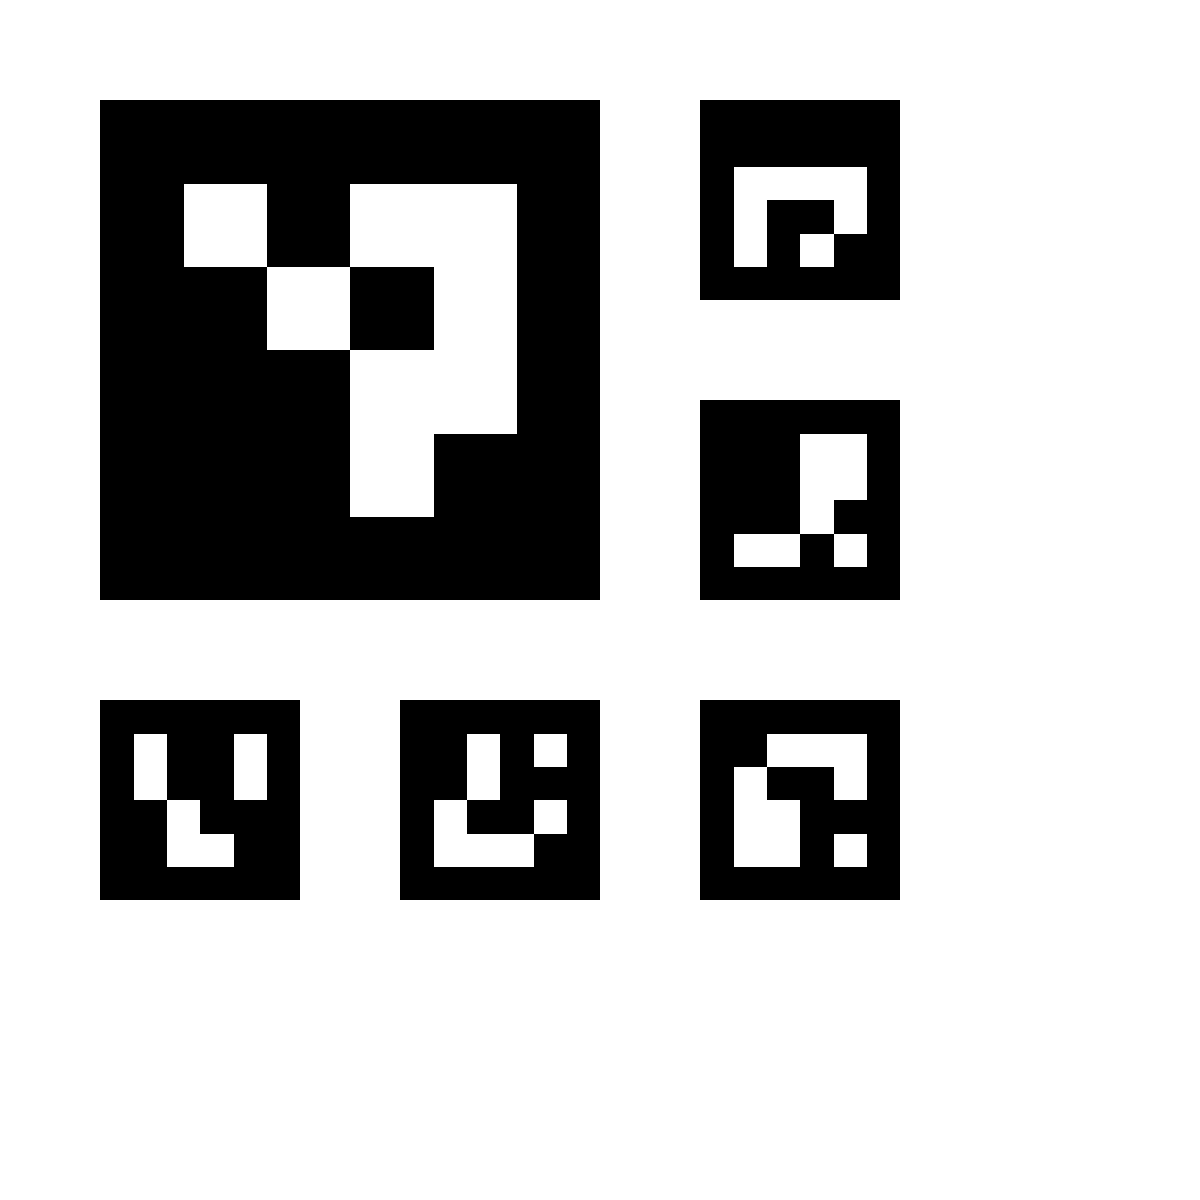

In [2]:
base_image